Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
import seaborn as sns

Importing the Dataset

In [2]:
music = pd.read_csv('musicdata.csv', encoding = "ISO-8859-1")

Looking at the Genres

In [3]:
music['genre'].value_counts()

Classical    472
Rock         377
Blues        368
Pop          271
Hip-Hop      205
Qawwali      198
Rap          186
EDM          140
Ghazal       134
Metal        113
Name: genre, dtype: int64

Testing out an SVM Model Without Hyperparameter Tuning

In [4]:
##Extracting all spotify features as a matrix
X = music.iloc[:, 3:26].values

## Extracting Genres
y = music['genre']

# split into training data (80%) and test data (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, shuffle = True, random_state=0)

# Standardize
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

#create parameter grid for tuning
svm = SVC(kernel = 'rbf', C=1, random_state = 0)
svm.fit(X_train_standardized,y_train)
y_predicted = svm.predict(X_test_standardized)
## 
print("Accuracy :\n", accuracy_score(y_true=y_test, y_pred=y_predicted))


Accuracy :
 0.5517241379310345


Tuning of hyperparameters and model selection

In [5]:
param_grid = { 'C':[0.1,1,100],'kernel':['rbf','linear'],'gamma': [1, 0.1, 0.01]}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, n_jobs= -1)

# train SVM
grid_model_result = grid.fit(X_train_standardized, y_train)

#extracting best parameters
best_params = grid.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


Getting the accuracy

In [5]:
y_predicted = grid_model_result.best_estimator_.predict(X_test_standardized)
print("Accuracy :\n", accuracy_score(y_true=y_test, y_pred=y_predicted))

NameError: name 'grid_model_result' is not defined

Checking Which Results Are Wrong

In [14]:
results = pd.DataFrame(X_test.copy())
results.loc[:, 'genre'] = list(y_test)
results.loc[:, 'preds'] = y_predicted.copy()
results_wrong = results[results['genre'] != results['preds']]
results_wrong['genre'].value_counts(normalize=True)

Blues        0.210084
Hip-Hop      0.159664
Pop          0.151261
EDM          0.109244
Metal        0.109244
Rap          0.067227
Rock         0.067227
Qawwali      0.058824
Ghazal       0.050420
Classical    0.016807
Name: genre, dtype: float64

<AxesSubplot:xlabel='genre', ylabel='count'>

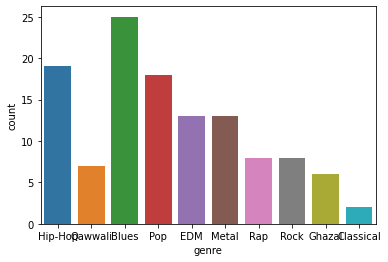

In [15]:
sns.countplot( x = results_wrong['genre'])

We can see from the chart that Blues, Ghazal and Qawwali are the most incorrectly classified, indicating that our hypothesis might be true and might have some weight to it